https://www.kaggle.com/datasets/purushottamnawale/materials/data

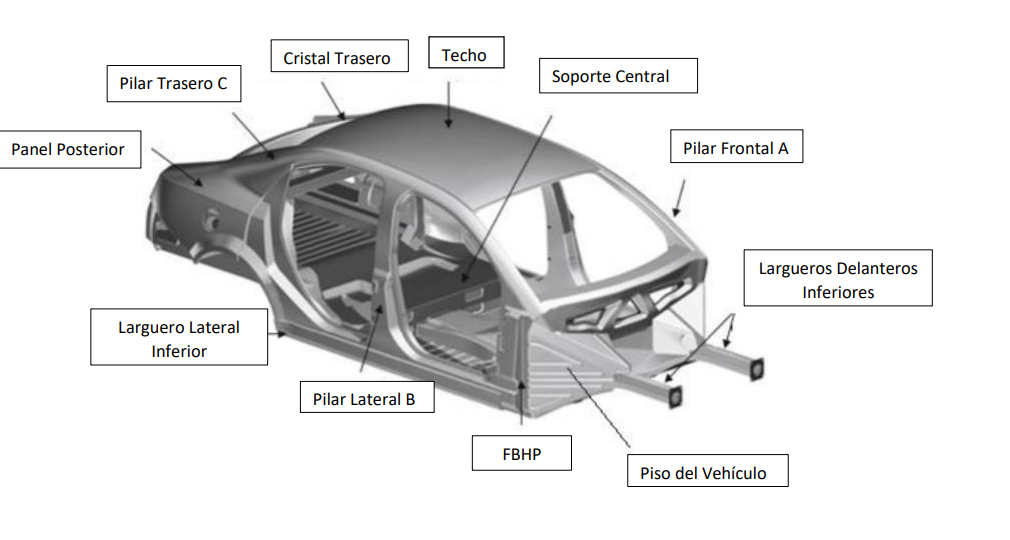

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz

In [7]:
import seaborn as sns

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("C:/Users/sergi/Downloads/material.csv")

- **Material**: Nombre del material.
- **Std e ID**: Identificadores y estándares únicos para los materiales.
- **Su**: Resistencia a la tracción última (MPa).
- **Sy**: Límite de fluencia (MPa).
- **E**: Módulo de Young (MPa).
- **G**: Módulo de corte (MPa).
- **$\mu$**: Relación de Poisson.
- **Ro**: Densidad (Kg/m³).
- **Use**: Indica si el material es adecuado para el chasis del EV (Sí/No).

**Descripción Conjunto de Datos**

- **Fuente**: Autodesk Material Library
- **Entradas**: 1,552 materiales
- **Columnas**: 15 columnas originales, de las cuales se seleccionaron 7 para el modelo de ML

| **Columna**    | **Descripción**                                     |
|----------------|-----------------------------------------------------|
| *Material*     | Nombre del material                                 |
| *Su*           | Resistencia a la tracción última (MPa)              |
| *Sy*           | Límite de fluencia (MPa)                            |
| *E*            | Módulo de Young (MPa)                               |
| *G*            | Módulo de Corte (MPa)                               |
| *mu*           | Relación de Poisson                                 |
| *Ro*           | Densidad (Kg/m³)                                    |
| *Use*          | Uso del material en chasis EV (Sí/No)               |

**Tabla**: Columnas utilizadas para el modelo de Machine Learning.


In [10]:
df

,Material,Su,Sy,E,G,mu,Ro,Use
0,ANSI Steel SAE 1015 as-rolled,421,314,207000,79000,0.30,7860,True
1,ANSI Steel SAE 1015 normalized,424,324,207000,79000,0.30,7860,True
2,ANSI Steel SAE 1015 annealed,386,284,207000,79000,0.30,7860,True
3,ANSI Steel SAE 1020 as-rolled,448,331,207000,79000,0.30,7860,True
4,ANSI Steel SAE 1020 normalized,441,346,207000,79000,0.30,7860,True
...,...,...,...,...,...,...,...,...
1547,JIS Nodular cast iron,600,370,169000,70000,0.20,7160,False
1548,JIS Nodular cast iron,700,420,169000,70000,0.20,7160,False
1549,JIS Nodular cast iron,800,480,169000,70000,0.20,7160,False
1550,JIS Malleable cast iron,400,180,160000,64000,0.27,7160,False


In [11]:
df.head(10)

,Material,Su,Sy,E,G,mu,Ro,Use
0,ANSI Steel SAE 1015 as-rolled,421,314,207000,79000,0.3,7860,True
1,ANSI Steel SAE 1015 normalized,424,324,207000,79000,0.3,7860,True
2,ANSI Steel SAE 1015 annealed,386,284,207000,79000,0.3,7860,True
3,ANSI Steel SAE 1020 as-rolled,448,331,207000,79000,0.3,7860,True
4,ANSI Steel SAE 1020 normalized,441,346,207000,79000,0.3,7860,True
5,ANSI Steel SAE 1020 annealed,395,295,207000,79000,0.3,7860,True
6,ANSI Steel SAE 1022 as-rolled,503,359,207000,79000,0.3,7860,True
7,ANSI Steel SAE 1022 normalized,483,359,207000,79000,0.3,7860,True
8,ANSI Steel SAE 1022 annealed,450,317,207000,79000,0.3,7860,True
9,ANSI Steel SAE 1030 as-rolled,552,345,207000,79000,0.3,7860,False


In [12]:
df.tail(10)

,Material,Su,Sy,E,G,mu,Ro,Use
1542,JIS Grey cast iron,200,200,85000,34000,0.25,7160,False
1543,JIS Grey cast iron,250,250,85000,34000,0.25,7160,False
1544,JIS Grey cast iron,300,300,85000,34000,0.25,7160,False
1545,JIS Grey cast iron,350,350,85000,34000,0.25,7160,False
1546,JIS Nodular cast iron,500,320,169000,70000,0.20,7160,False
1547,JIS Nodular cast iron,600,370,169000,70000,0.20,7160,False
1548,JIS Nodular cast iron,700,420,169000,70000,0.20,7160,False
1549,JIS Nodular cast iron,800,480,169000,70000,0.20,7160,False
1550,JIS Malleable cast iron,400,180,160000,64000,0.27,7160,False
1551,JIS Malleable cast iron,500,260,160000,64000,0.27,7160,False


In [13]:
df.dtypes

Material     object
Su            int64
Sy            int64
E             int64
G             int64
mu          float64
Ro            int64
Use            bool
dtype: object

In [14]:
df.describe()

,Su,Sy,E,G,mu,Ro
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,572.753222,387.010309,164571.520619,85598.840206,0.302977,6929.843428
std,326.834927,289.482497,56135.405867,125326.800138,0.024590,2115.171710
min,69.000000,28.000000,73000.000000,26000.000000,0.200000,1750.000000
25%,340.000000,205.000000,105000.000000,40000.000000,0.300000,7160.000000
50%,500.000000,305.000000,206000.000000,79000.000000,0.300000,7860.000000
75%,705.000000,470.000000,206000.000000,80000.000000,0.320000,7860.000000
max,2220.000000,2048.000000,219000.000000,769000.000000,0.350000,8930.000000


   - **count**: Número de observaciones.
   - **mean**: Promedio de la propiedad.
   - **std**: Desviación estándar, que mide la dispersión de los valores.
   - **min**: Valor mínimo registrado.
   - **25%**: Percentil 25, indicando que el 25% de los materiales tienen una resistencia menor al valor dado.
   - **50% (mediana)**: Valor central, donde el 50% tiene resistencia menor al valor dado.
   - **75%**: Percentil 75, donde el 75% tiene resistencia menor al valor dado.
   - **max**: Valor máximo registrado.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Material  1552 non-null   object 
 1   Su        1552 non-null   int64  
 2   Sy        1552 non-null   int64  
 3   E         1552 non-null   int64  
 4   G         1552 non-null   int64  
 5   mu        1552 non-null   float64
 6   Ro        1552 non-null   int64  
 7   Use       1552 non-null   bool   
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 86.5+ KB


Non-Null Count: Número de valores no nulos en la columna (en este caso, todas tienen 1552 no nulos).

In [16]:
df.isnull().sum()

Material    0
Su          0
Sy          0
E           0
G           0
mu          0
Ro          0
Use         0
dtype: int64

In [17]:
n = df['Material'].unique()

In [18]:
n

array(['ANSI Steel SAE 1015 as-rolled', 'ANSI Steel SAE 1015 normalized',
       'ANSI Steel SAE 1015 annealed', ..., 'JIS Grey cast iron ',
       'JIS Nodular cast iron ', 'JIS Malleable cast iron '], dtype=object)

In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1547    False
1548    False
1549    False
1550    False
1551    False
Length: 1552, dtype: bool

**Media de cada tipo de Material:**

In [20]:
df.pivot_table(index='Material', values=['Su', 'Sy'], aggfunc='mean')

,Su,Sy
Material,,
ANSI Aluminum Alloy 1060-H12 Wrought,83.0,76.0
ANSI Aluminum Alloy 1060-H14 Wrought,97.0,90.0
ANSI Aluminum Alloy 1060-H16 Wrought,110.0,103.0
ANSI Aluminum Alloy 1060-H18 Wrought,131.0,124.0
ANSI Aluminum Alloy 1060-O Wrought,69.0,28.0
...,...,...
NF NF Z8C17,440.0,245.0
NF NF Z8CA7,440.0,240.0
NF NF ZE,270.0,240.0


In [21]:
df.pivot_table(index='Material', values=['E', 'G'], aggfunc='mean')

,E,G
Material,,
ANSI Aluminum Alloy 1060-H12 Wrought,73000.0,26000.0
ANSI Aluminum Alloy 1060-H14 Wrought,73000.0,26000.0
ANSI Aluminum Alloy 1060-H16 Wrought,73000.0,26000.0
ANSI Aluminum Alloy 1060-H18 Wrought,73000.0,26000.0
ANSI Aluminum Alloy 1060-O Wrought,73000.0,26000.0
...,...,...
NF NF Z8C17,206000.0,80000.0
NF NF Z8CA7,206000.0,80000.0
NF NF ZE,206000.0,80000.0


<Axes: >

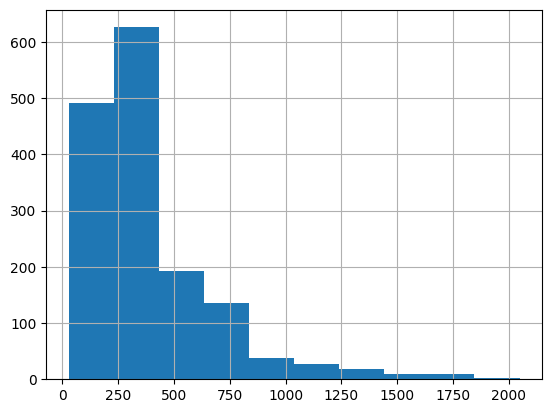

In [22]:
df['Sy'].hist() #por defecto son 10 intervalos

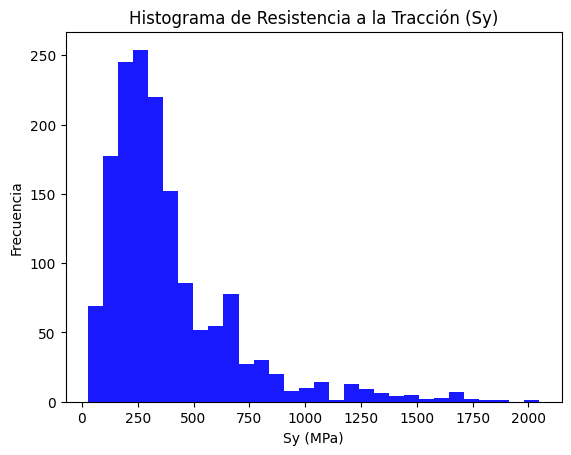

In [23]:
df['Sy'].hist(bins=30, alpha=0.9, color='blue')
plt.title('Histograma de Resistencia a la Tracción (Sy)')
plt.xlabel('Sy (MPa)')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

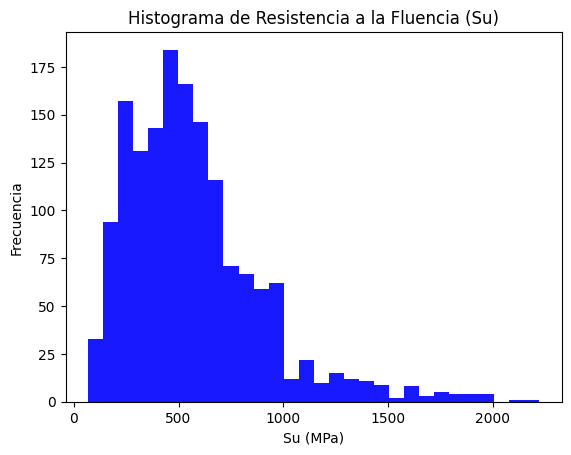

In [24]:
df['Su'].hist(bins=30, alpha=0.9, color='blue')
plt.title('Histograma de Resistencia a la Fluencia (Su)')
plt.xlabel('Su (MPa)')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()


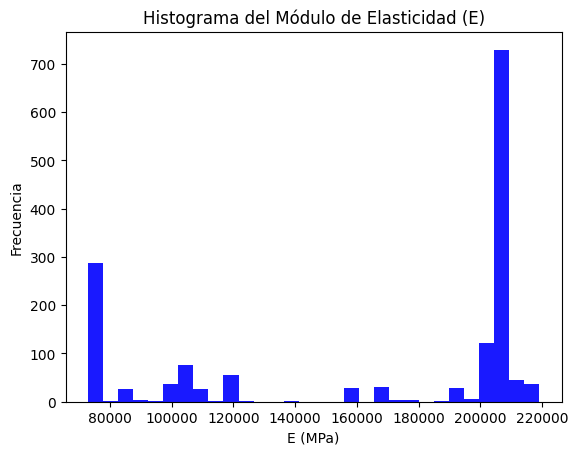

In [25]:
df['E'].hist(bins=30, alpha=0.9, color='blue')
plt.title('Histograma del Módulo de Elasticidad (E)')
plt.xlabel('E (MPa)')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()


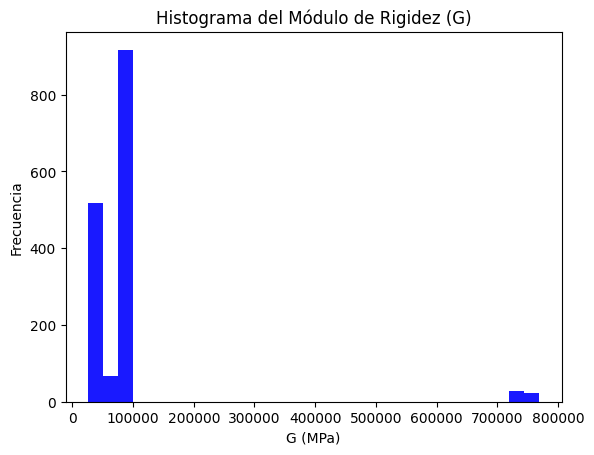

In [26]:
df['G'].hist(bins=30, alpha=0.9, color='blue')
plt.title('Histograma del Módulo de Rigidez (G)')
plt.xlabel('G (MPa)')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()


In [27]:
df_numerico = df[['Su', 'Sy', 'E', 'G', 'mu', 'Ro']]

In [28]:
# Función para detectar outliers usando IQR
def detect_outliers_iqr(data):
    outliers = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)  # Primer cuartil
        Q3 = data[column].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1                      # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR       # Límite inferior
        upper_bound = Q3 + 1.5 * IQR       # Límite superior
        
        # Identificar outliers
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers

# Detectar outliers para todas las variables numéricas
outliers_dict = detect_outliers_iqr(df_numerico)

# Mostrar outliers encontrados
for column, outlier_data in outliers_dict.items():
    print(f"Outliers en la columna {column}:\n{outlier_data}\n")

Outliers en la columna Su:
        Su    Sy       E      G   mu    Ro
28    1303   979  207000  79000  0.3  7860
32    1289   827  207000  79000  0.3  7860
46    1634  1213  207000  79000  0.3  7860
53    1806  1593  207000  79000  0.3  7860
57    1800  1662  207000  79000  0.3  7860
...    ...   ...     ...    ...  ...   ...
1363  1270  1175  206000  80000  0.3  7860
1364  1420  1325  206000  80000  0.3  7860
1426  1500  1350  206000  80000  0.3  7860
1434  1370  1180  206000  80000  0.3  7860
1441  1320  1125  206000  80000  0.3  7860

[73 rows x 6 columns]

Outliers en la columna Sy:
        Su    Sy       E      G   mu    Ro
28    1303   979  207000  79000  0.3  7860
42    1082   938  207000  79000  0.3  7860
46    1634  1213  207000  79000  0.3  7860
53    1806  1593  207000  79000  0.3  7860
57    1800  1662  207000  79000  0.3  7860
...    ...   ...     ...    ...  ...   ...
1441  1320  1125  206000  80000  0.3  7860
1513  1226  1079  206000  80000  0.3  7860
1518  1226  1079  2

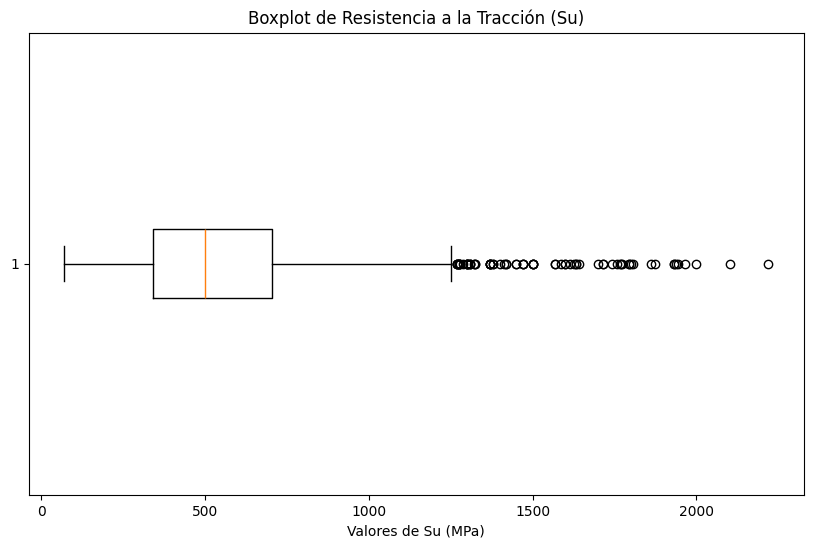

In [29]:
# Boxplot para visualizar outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['Su'], vert=False)
plt.title('Boxplot de Resistencia a la Tracción (Su)')
plt.xlabel('Valores de Su (MPa)')
plt.show()

<Axes: >

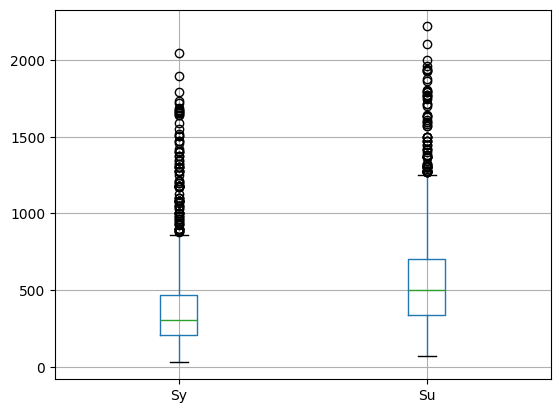

In [30]:
df.boxplot(column=['Sy','Su'])

<Axes: >

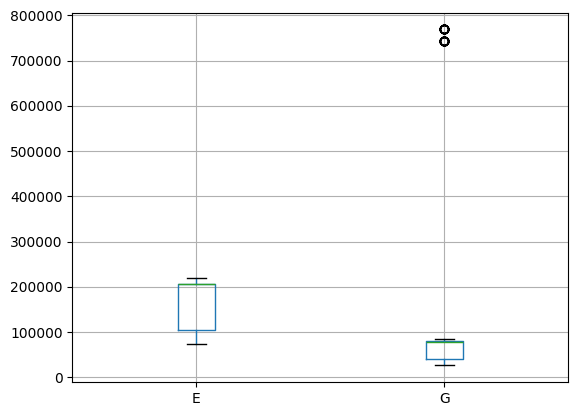

In [31]:
df.boxplot(column=['E','G'])

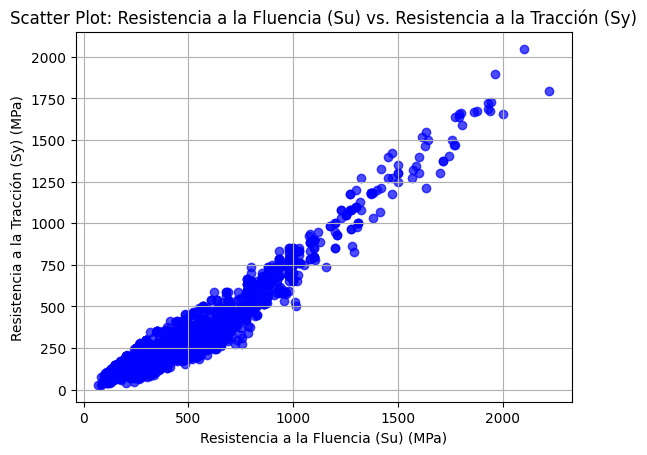

In [32]:
plt.scatter(df['Su'], df['Sy'], alpha=0.7, color='blue')
plt.title('Scatter Plot: Resistencia a la Fluencia (Su) vs. Resistencia a la Tracción (Sy)')
plt.xlabel('Resistencia a la Fluencia (Su) (MPa)')
plt.ylabel('Resistencia a la Tracción (Sy) (MPa)')
plt.grid(True)
plt.show()

In [33]:
n = df['Material'].nunique()

# Imprimir el resultado
print(f'Número total de materiales únicos: {n}')

Número total de materiales únicos: 1460


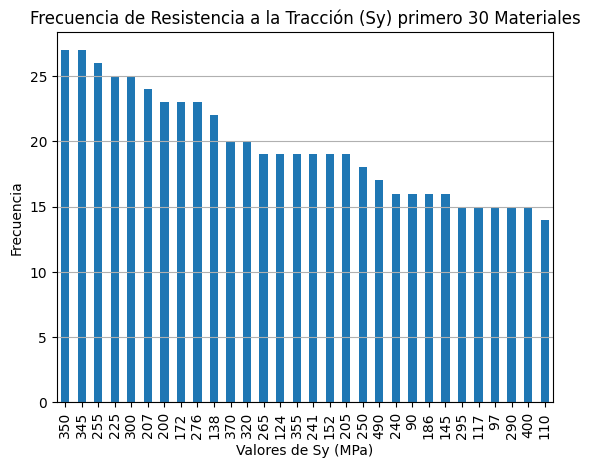

In [34]:
sy30 = df['Sy'].value_counts().nlargest(30)

# Crear el gráfico de barras
sy30.plot.bar()
plt.title('Frecuencia de Resistencia a la Tracción (Sy) primero 30 Materiales')
plt.xlabel('Valores de Sy (MPa)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')  # Solo la cuadrícula en el eje Y
plt.show()

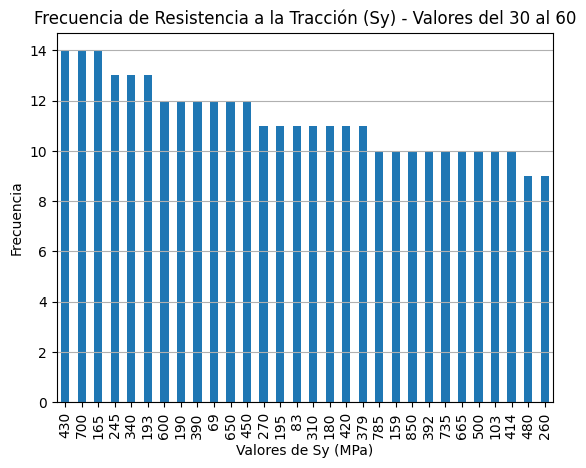

In [35]:
frecuencia_sy = df['Sy'].value_counts()
sy_30_a_60 = frecuencia_sy.iloc[30:60]  # Ajusta si tienes menos de 60 valores

# Crear el gráfico de barras
sy_30_a_60.plot.bar()
plt.title('Frecuencia de Resistencia a la Tracción (Sy) - Valores del 30 al 60')
plt.xlabel('Valores de Sy (MPa)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')  # Solo la cuadrícula en el eje Y
plt.show()

**Correlación:**

La correlación es una medida que indica la extensión en que dos variables están linealmente relacionadas. Se mide en una escala de -1 a 1.

- Correlación positiva: Valores cercanos a 1 indican que a medida que una variable aumenta, la otra también tiende a aumentar.
- Correlación negativa: Valores cercanos a -1 indican que a medida que una variable aumenta, la otra tiende a disminuir.
- Correlación nula: Valores cercanos a 0 indican que no hay una relación lineal significativa entre las variables.

La correlación entre dos variables \(X\) y \(Y\) se calcula con la siguiente fórmula:

$$
r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

Donde:
- $r$ es el coeficiente de correlación de Pearson.
- $\text{Cov}(X, Y)$ es la covarianza entre $X$ y $Y$;
- $\sigma_X$ es la desviación estándar de $X$;
- $\sigma_Y$ es la desviación estándar de $Y$;


In [36]:
df_numerico = df.select_dtypes(include=['number'])

In [37]:
correlacion = df_numerico.corr()

In [38]:
correlacion

,Su,Sy,E,G,mu,Ro
Su,1.000000,0.957244,0.594348,0.254508,-0.239663,0.407995
Sy,0.957244,1.000000,0.472434,0.179293,-0.190256,0.273860
E,0.594348,0.472434,1.000000,0.279431,-0.446692,0.716853
G,0.254508,0.179293,0.279431,1.000000,-0.108699,0.222848
mu,-0.239663,-0.190256,-0.446692,-0.108699,1.000000,-0.400175
Ro,0.407995,0.273860,0.716853,0.222848,-0.400175,1.000000


Hay una correlación positiva moderada entre el módulo de elasticidad $E$ y la densidad $Ro$, lo que podría implicar que materiales con un mayor módulo de elasticidad tienden a tener una mayor densidad.

**Covarianza:**

La covarianza es una medida que indica la dirección de la relación lineal entre dos variables. Se calcula como el promedio de los productos de las diferencias de cada variable respecto a su media.

Al igual que la correlación, la covarianza puede ser:

- **Positiva**: Indica que cuando una variable aumenta, la otra también tiende a aumentar.
- **Negativa**: Indica que cuando una variable aumenta, la otra tiende a disminuir.
- **Cercana a cero**: Indica que no hay una relación lineal significativa entre las variables.


$$
\text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
$$

Donde: 
- $n$ es el número total de observaciones.
- $X_i$ es el valor de la variable $X$ en la $i$-ésima observación.
- $\bar{X}$ es la media de los valores de la variable $X$.
- $Y_i$ es el valor de la variable $Y$ en la $i$-ésima observación.
- $\bar{Y}$ es la media de los valores de la variable $Y$.

In [39]:
df_numerico.cov()

,Su,Sy,E,G,mu,Ro
Su,1.068211e+05,9.056772e+04,1.090451e+07,1.042494e+07,-1.926151,2.820517e+05
Sy,9.056772e+04,8.380012e+04,7.677156e+06,6.504741e+06,-1.354318,1.676859e+05
E,1.090451e+07,7.677156e+06,3.151184e+09,1.965872e+09,-616.602466,8.511626e+07
G,1.042494e+07,6.504741e+06,1.965872e+09,1.570681e+10,-334.988164,5.907428e+07
mu,-1.926151e+00,-1.354318e+00,-6.166025e+02,-3.349882e+02,0.000605,-2.081401e+01
Ro,2.820517e+05,1.676859e+05,8.511626e+07,5.907428e+07,-20.814015,4.473951e+06


<Figure size 1200x600 with 0 Axes>

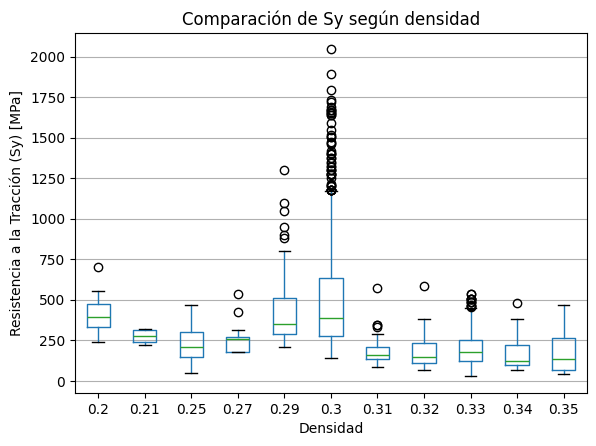

In [40]:
plt.figure(figsize=(12, 6))
df.boxplot(column='Sy', by='mu', grid=False)
plt.title('Comparación de Sy según densidad')
plt.suptitle('')  # Eliminar el título por defecto
plt.xlabel('Densidad')
plt.ylabel('Resistencia a la Tracción (Sy) [MPa]')
plt.grid(axis='y')
plt.show()

$Sy = m \cdot Su + b$

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [42]:
# Definir las variables independientes (Su) y dependientes (Sy)
X = df['Su'].values.reshape(-1, 1)  # Resistencia a la Fluencia (Su)
y = df['Sy'].values  # Resistencia a la Tracción (Sy)

In [43]:
model = LinearRegression()

In [44]:
# Ajustar el modelo a los datos
model.fit(X, y)

LinearRegression()

In [45]:
# Predecir los valores de Sy usando el modelo ajustado
y_pred = model.predict(X)

In [46]:
# Calcular el coeficiente de determinación R^2
r2 = r2_score(y, y_pred)

In [47]:
r2

0.9163161012380584

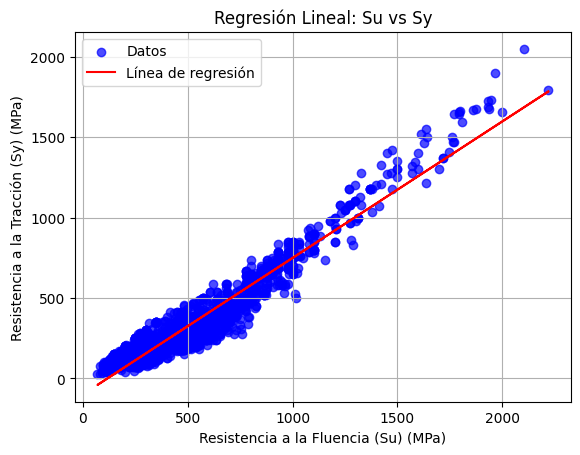

In [48]:
# Graficar los datos y la línea de regresión
plt.scatter(X, y, color='blue', alpha=0.7, label='Datos')
plt.plot(X, y_pred, color='red', label='Línea de regresión')
plt.title('Regresión Lineal: Su vs Sy')
plt.xlabel('Resistencia a la Fluencia (Su) (MPa)')
plt.ylabel('Resistencia a la Tracción (Sy) (MPa)')
plt.grid(True)
plt.legend()
plt.show()

In [49]:
print(f"Ecuación de la regresión: Sy = {model.coef_[0]:.3f} * Su + ({model.intercept_:.3f})")
print(f"Coeficiente de determinación R^2: {r2:.4f}")

Ecuación de la regresión: Sy = 0.848 * Su + (-98.596)
Coeficiente de determinación R^2: 0.9163


In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  

In [51]:
mse = mean_squared_error(y, y_pred)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
mae = mean_absolute_error(y, y_pred)  # Error absoluto medio

In [52]:
mse

7008.201913790653

In [53]:
rmse

83.71500411390214

In [54]:
mae

66.89639749336928

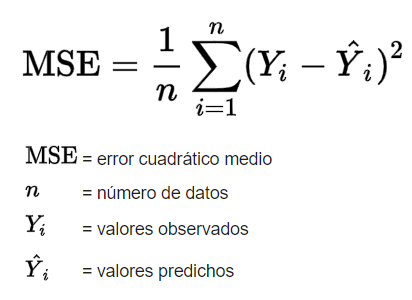

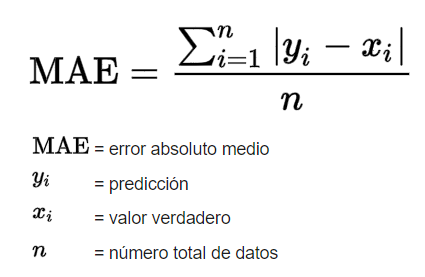

In [55]:
# Función para eliminar outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Primer cuartil
    Q3 = df[column].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Eliminar outliers de Su
df_cleaned = remove_outliers(df, 'Su')

# Eliminar outliers de Sy en el DataFrame ya filtrado de Su
df_cleaned = remove_outliers(df_cleaned, 'Sy')

df_cleaned

,Material,Su,Sy,E,G,mu,Ro,Use
0,ANSI Steel SAE 1015 as-rolled,421,314,207000,79000,0.30,7860,True
1,ANSI Steel SAE 1015 normalized,424,324,207000,79000,0.30,7860,True
2,ANSI Steel SAE 1015 annealed,386,284,207000,79000,0.30,7860,True
3,ANSI Steel SAE 1020 as-rolled,448,331,207000,79000,0.30,7860,True
4,ANSI Steel SAE 1020 normalized,441,346,207000,79000,0.30,7860,True
...,...,...,...,...,...,...,...,...
1547,JIS Nodular cast iron,600,370,169000,70000,0.20,7160,False
1548,JIS Nodular cast iron,700,420,169000,70000,0.20,7160,False
1549,JIS Nodular cast iron,800,480,169000,70000,0.20,7160,False
1550,JIS Malleable cast iron,400,180,160000,64000,0.27,7160,False


In [56]:
dfdu = df_cleaned.drop_duplicates()

In [57]:
dfdu

,Material,Su,Sy,E,G,mu,Ro,Use
0,ANSI Steel SAE 1015 as-rolled,421,314,207000,79000,0.30,7860,True
1,ANSI Steel SAE 1015 normalized,424,324,207000,79000,0.30,7860,True
2,ANSI Steel SAE 1015 annealed,386,284,207000,79000,0.30,7860,True
3,ANSI Steel SAE 1020 as-rolled,448,331,207000,79000,0.30,7860,True
4,ANSI Steel SAE 1020 normalized,441,346,207000,79000,0.30,7860,True
...,...,...,...,...,...,...,...,...
1547,JIS Nodular cast iron,600,370,169000,70000,0.20,7160,False
1548,JIS Nodular cast iron,700,420,169000,70000,0.20,7160,False
1549,JIS Nodular cast iron,800,480,169000,70000,0.20,7160,False
1550,JIS Malleable cast iron,400,180,160000,64000,0.27,7160,False


In [58]:
X = df[['Su']]  # Variable independiente
y = df['Sy']    # Variable dependiente

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# Dividir los datos en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

In [61]:
# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # R^2

# Mostrar resultados
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Mostrar la intersección (intercepto)
intercept = model.intercept_
print("Intercept:", intercept)

Mean Squared Error: 6777.515534301194
R^2 Score: 0.9089305834936583
    Coefficient
Su     0.851011
Intercept: -102.26070191631726


In [62]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [63]:
# Configurar KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convertir a positivo
cv_scores = -cv_scores

# Imprimir los resultados
print("MSE de la validación cruzada:", cv_scores)
print("Promedio del MSE de la validación cruzada:", cv_scores.mean())

MSE de la validación cruzada: [6777.5155343  7265.61760156 7771.67927633 6663.68135828 6667.43134978]
Promedio del MSE de la validación cruzada: 7029.185024049448


In [64]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MSE y R² en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Mean Squared Error en el conjunto de prueba:", mse_test)
print("R² Score en el conjunto de prueba:", r2_test)

Mean Squared Error en el conjunto de prueba: 6777.515534301194
R² Score en el conjunto de prueba: 0.9089305834936583


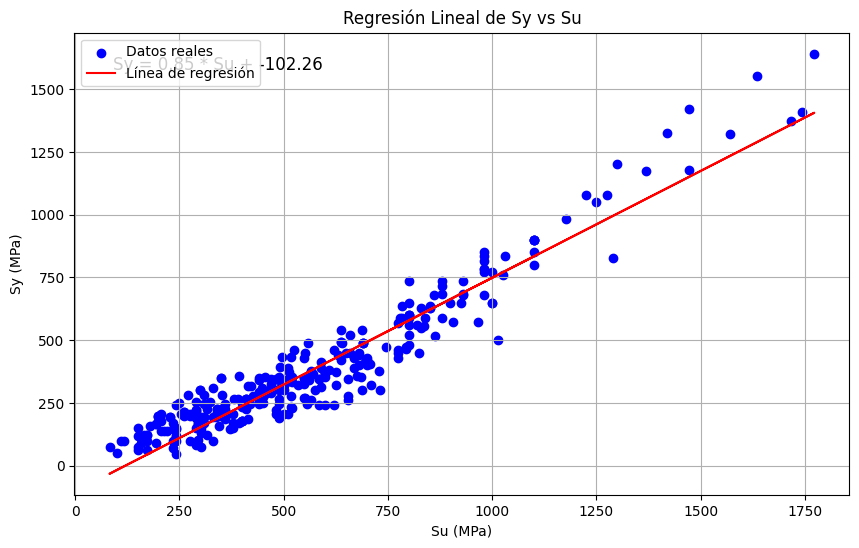

In [69]:
# Graficar los datos y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')  # Datos de prueba
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')  # Línea de regresión
plt.title('Regresión Lineal de Sy vs Su')
plt.xlabel('Su (MPa)')
plt.ylabel('Sy (MPa)')
plt.legend()
plt.grid()

# Mostrar la ecuación del modelo
slope = model.coef_[0]
intercept = model.intercept_
plt.text(0.05, 0.95, equation, fontsize=12, ha='left', va='top', transform=plt.gca().transAxes)

plt.show()

In [70]:
equation = f"Sy = {slope:.2f} * Su + {intercept:.2f}"

In [71]:
equation

'Sy = 0.85 * Su + -102.26'

In [72]:
# Importar el modelo (en este caso, regresión lineal)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score